This Python project explores user listening behavior using a real-world Spotify dataset from Kaggle. Each record captures information about a specific track played on Spotify, including metadata about the track, playback behavior, and the user's interaction with the platform. It spans multiple years and provides insights into user behavior, track preferences, and session dynamics.

In this project, we use Python and popular data analysis libraries such as Pandas, NumPy, Matplotlib, and Plotly to analyze various aspects of Spotify listening data. The dataset includes timestamped records of songs played, play durations, device types, and user actions (such as shuffle mode).

We aim to answer questions such as:
1. Listening Habits Dashboard

-Most played artists, songs, and albums
-Listening trends by hour, day, month, and year
-Platform usage distribution (e.g., web vs mobile)

2. Song Engagement Analysis

-Which songs were skipped quickly?
-What makes a song unskippable?
-Skip Rate


By the end of the project, we will generate visual insights and statistical summaries that reveal patterns in music consumption, helping to better understand user preferences and engagement on Spotify.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv(r"D:\AllenMartinezPicazo\Certificates, Portfolio and Projects\Projects\Real Datasets Project\raw data\spotify_history.csv")

In [3]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [5]:
df.columns

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')

Data Cleaning

In [ ]:
#Checking for Null Values
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [ ]:
#Checking for Duplicated Values
df.duplicated().sum()

np.int64(1185)

In [8]:
#Converting timestamp to datetime
df['ts'] = pd.to_datetime(df['ts'])

#Adding additional features on the date

df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month_name()
df['day'] = df['ts'].dt.day_name()
df['hour'] = df['ts'].dt.hour
df['minute'] = df['ts'].dt.minute


In [ ]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,year,month,day,hour,minute
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013,July,Monday,2,44
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013,July,Monday,2,45
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013,July,Monday,2,50
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013,July,Monday,2,52
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False,2013,July,Monday,3,17


In [ ]:
#Check for null values
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
year                   0
month                  0
day                    0
hour                   0
date                   0
dtype: int64

In [ ]:
df['reason_end'] = df['reason_end'].fillna('Unknown')
df['reason_start']= df['reason_start'].fillna('Unknown')    

In [ ]:
df.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
year                 0
month                0
day                  0
hour                 0
date                 0
dtype: int64

Exploratory Data Analysis


Most played artists, songs, and albums

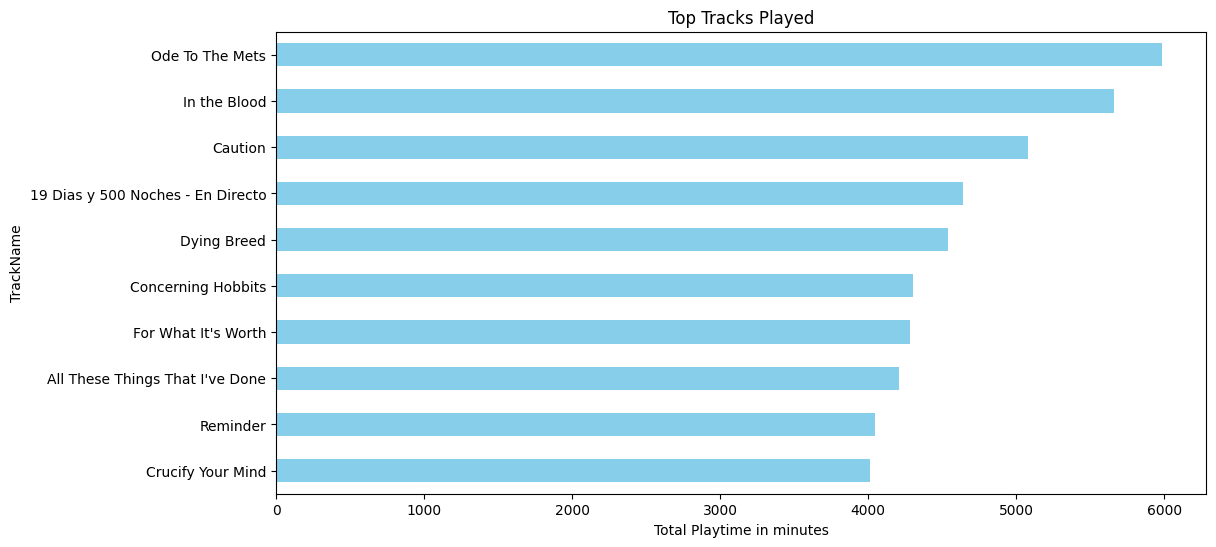

In [ ]:
top_tracks = df.groupby('track_name')['minute'].sum().sort_values(ascending=False).head(10)
top_tracks

plt.figure(figsize=(12, 6))
top_tracks.plot(kind='barh', color='skyblue')
plt.title('Top Tracks Played')
plt.xlabel('Total Playtime in minutes')
plt.ylabel('TrackName')
plt.gca().invert_yaxis()
plt.show()

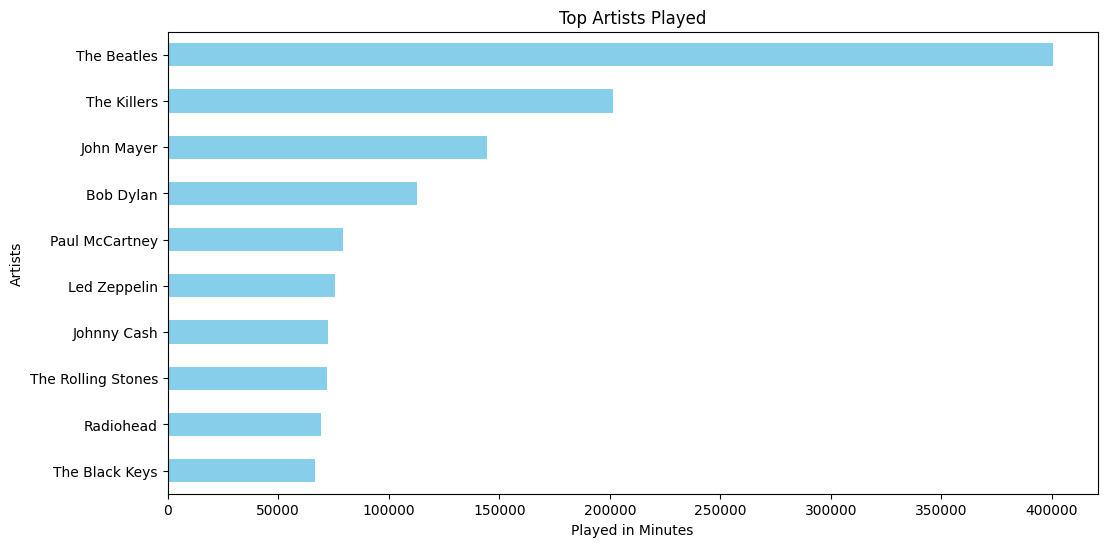

In [ ]:
top_artists = df.groupby('artist_name')['minute'].sum().sort_values(ascending=False).head(10)
top_artists

plt.figure(figsize=(12,6))
top_artists.plot(kind='barh', color='skyblue')
plt.title('Top Artists Played')
plt.xlabel('Played in Minutes')
plt.ylabel('Artists')
plt.gca().invert_yaxis()
plt.show()


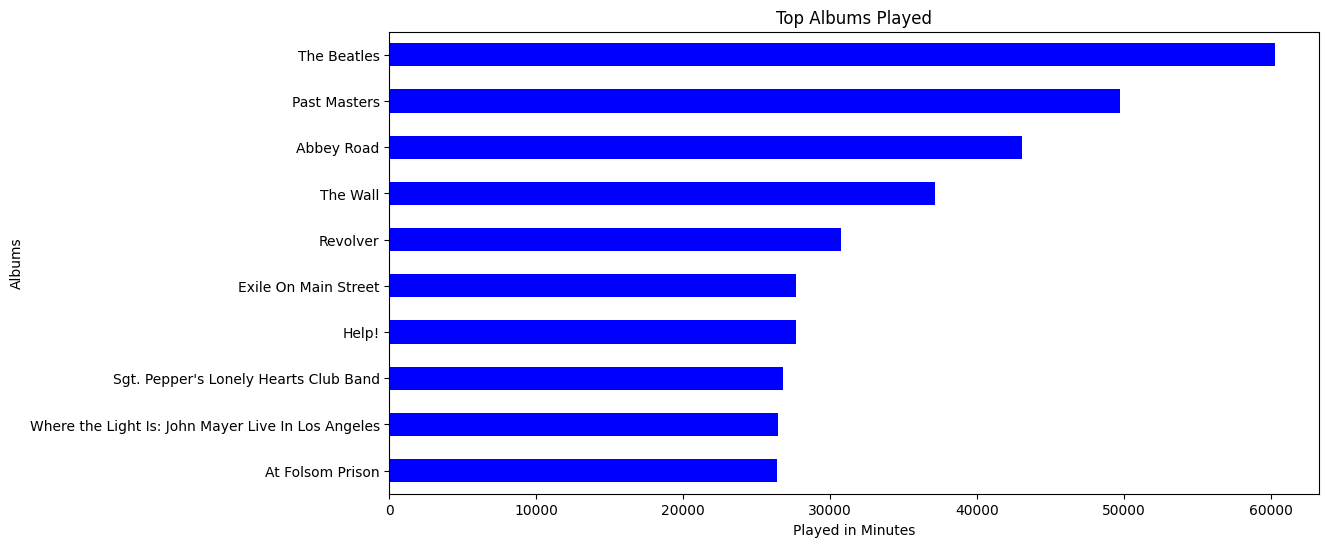

In [ ]:
top_albums = df.groupby('album_name')['minute'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_albums.plot(kind='barh', color='blue')
plt.title('Top Albums Played')
plt.xlabel('Played in Minutes')
plt.ylabel('Albums')
plt.gca().invert_yaxis()
plt.show()

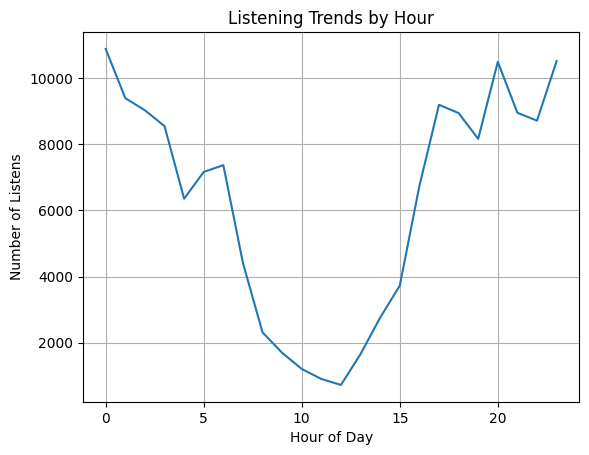

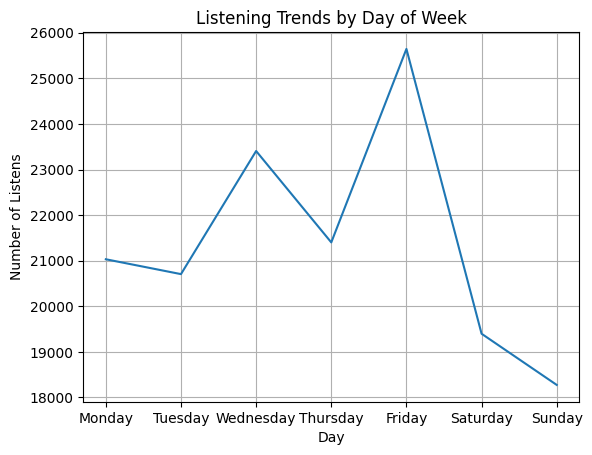

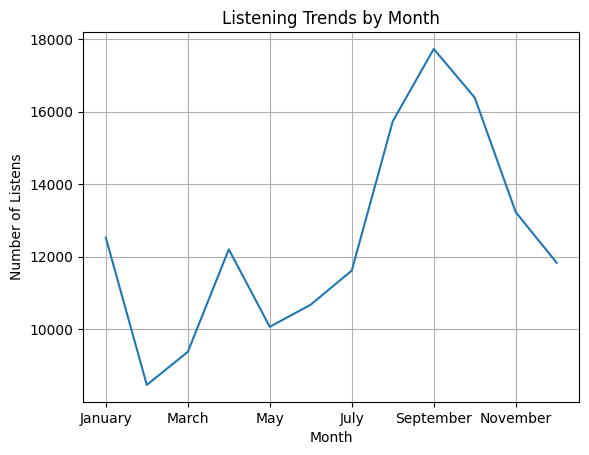

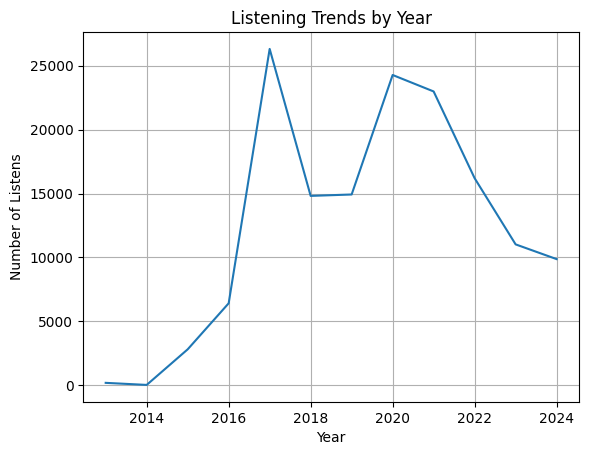

In [ ]:
# Hourly trend
hourly = df['hour'].value_counts().sort_index()
plt.figure()
hourly.plot(kind='line')
plt.title('Listening Trends by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Listens')
plt.grid(True)
plt.show()

# Daily trend
daily = df['day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure()
daily.plot(kind='line')
plt.title('Listening Trends by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Listens')
plt.grid(True)
plt.show()

# Monthly trend
monthly = df['month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure()
monthly.plot(kind='line')
plt.title('Listening Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Listens')
plt.grid(True)
plt.show()

# Yearly trend
yearly = df['year'].value_counts().sort_index()
plt.figure()
yearly.plot(kind='line')
plt.title('Listening Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Listens')
plt.grid(True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149860 entries, 2013-07-08 02:44:34 to 2024-12-15 23:06:25
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   platform           149860 non-null  object
 2   ms_played          149860 non-null  int64 
 3   track_name         149860 non-null  object
 4   artist_name        149860 non-null  object
 5   album_name         149860 non-null  object
 6   reason_start       149717 non-null  object
 7   reason_end         149743 non-null  object
 8   shuffle            149860 non-null  bool  
 9   skipped            149860 non-null  bool  
 10  year               149860 non-null  int32 
 11  month              149860 non-null  object
 12  day                149860 non-null  object
 13  hour               149860 non-null  int32 
 14  minute             149860 non-null  int32 
dtypes: bool(2), int32(3), int64(1), ob

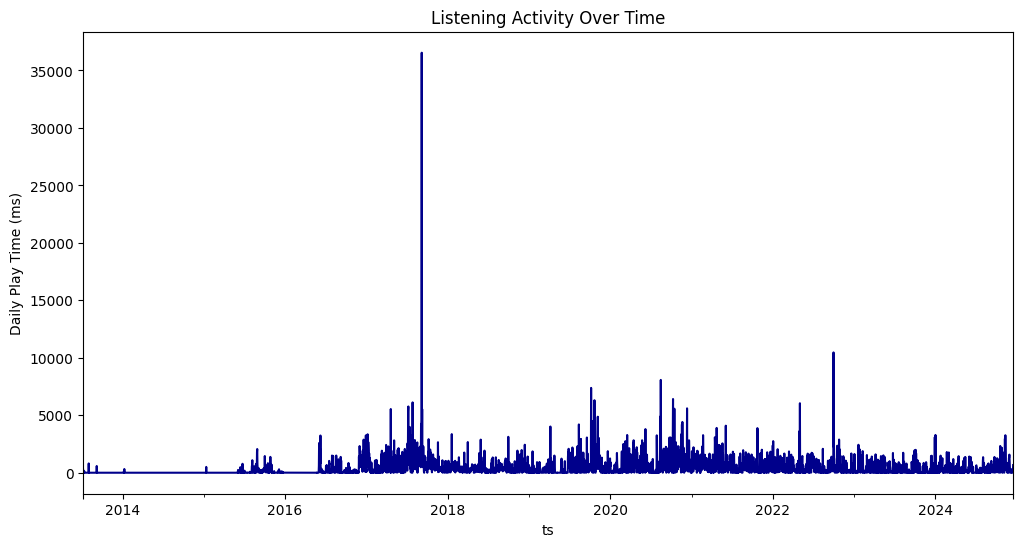

In [ ]:
#Listening Activity Over Time
daily_listening = df['hour'].resample('D').sum()
daily_listening.plot(figsize=(12,6), color='darkblue')
plt.ylabel('Daily Play Time (ms)')
plt.title('Listening Activity Over Time')
plt.show()

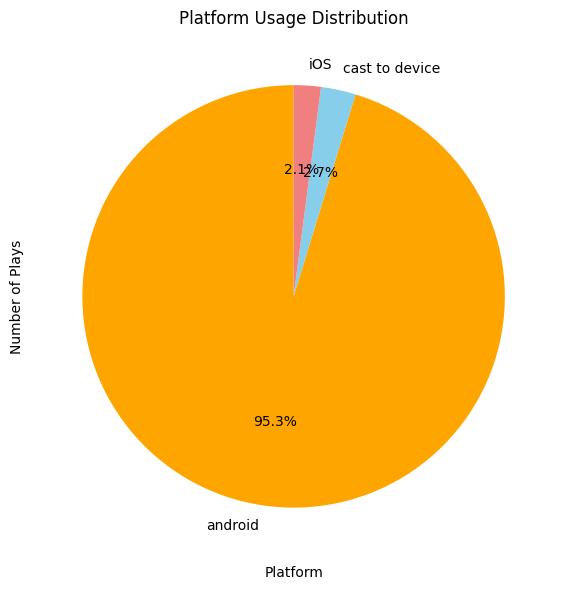

In [ ]:
#Platform Usage

platform_usage = df['platform'].value_counts().head(3)
platform_usage.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6,6), colors=['orange', 'skyblue', 'lightcoral'])
plt.title('Platform Usage Distribution')
plt.xlabel('Platform')
plt.ylabel('Number of Plays')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


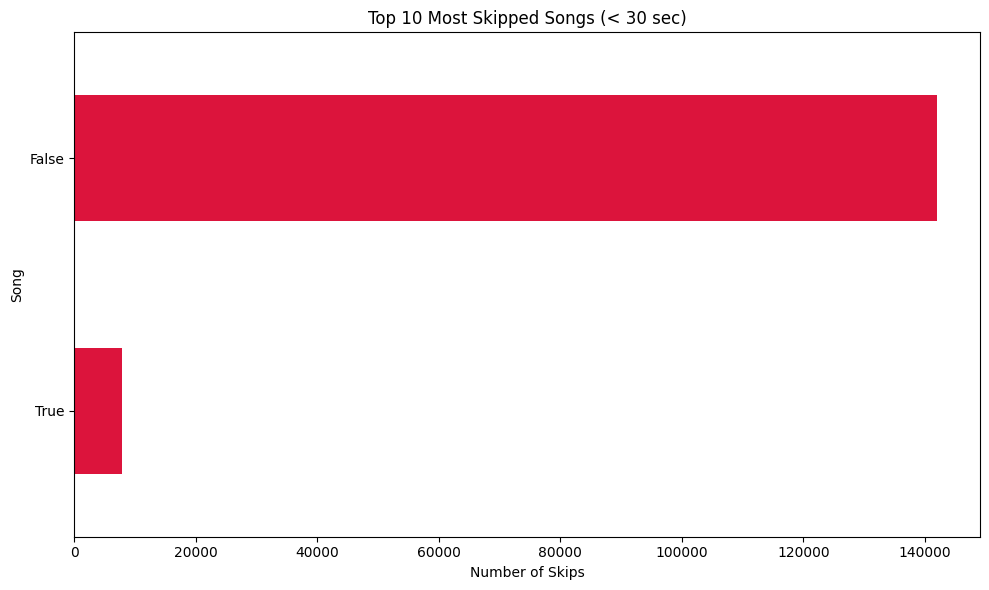

In [ ]:
skipped = df[df['ms_played']<30000] 
skipped_songs = df['skipped'].value_counts().head(10)

skipped_songs.plot(kind='barh', figsize=(10, 6), color='crimson')
plt.title('Top 10 Most Skipped Songs (< 30 sec)')
plt.xlabel('Number of Skips')
plt.ylabel('Song')
plt.gca().invert_yaxis()  # Highest skip at top
plt.tight_layout()
plt.show()

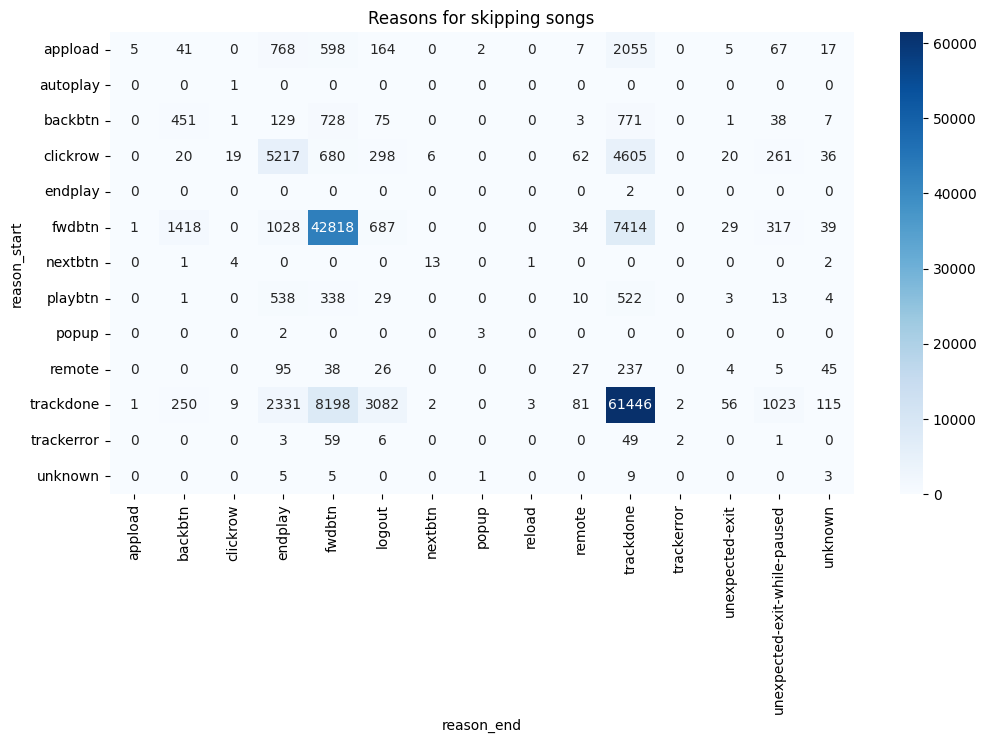

In [ ]:
start_end = pd.crosstab(df['reason_start'],df['reason_end'])
plt.figure(figsize=(12,6))
sns.heatmap(start_end, annot=True, fmt='d', cmap='Blues')
plt.title('Reasons for skipping songs')
plt.show()

Number of Session by Platforms

In [ ]:
import plotly.express as px

# Count sessions by platform
platform_counts = df['platform'].value_counts().reset_index()
platform_counts.columns = ['platform', 'session_count']

# Plot
fig1 = px.bar(
    platform_counts,
    x='platform',
    y='session_count',
    text='session_count',
    title='Number of Sessions by Platform',
)

fig1.show()


In [ ]:
#Average Playtime Shuffle

In [ ]:
avg_playtime_shuffle = (
    df.groupby('shuffle')['ms_played']
    .mean()
    .reset_index()
)

avg_playtime_shuffle['minute'] = avg_playtime_shuffle['ms_played'] / 60000

fig1 = px.pie(
    avg_playtime_shuffle,
    values='minute',
    names='shuffle',
    title='Average Playtime (in Minutes) by Shuffle Mode',
    color_discrete_sequence=["#1ED62A", "#DD5907"],

)

fig1.update_traces(textinfo='label+percent+value', texttemplate='%{label}: %{value:.2f} min')
fig1.show()

In [ ]:
#Skip Rate shuffle

In [ ]:
skip_rate_shuffle = (
    df.groupby('shuffle')['skipped']
    .mean()
    .reset_index()
    .rename(columns={'skipped': 'skip_rate'})
)

fig = px.pie(
    skip_rate_shuffle,
    values='skip_rate',
    names='shuffle',
    title='Skip Rate by Shuffle Mode',
    color_discrete_sequence=["#1ED62A", "#DD5907"],

)

fig.update_traces(textinfo='percent+label')
fig.update_layout(showlegend=True)
fig.show()

Conclusion and Key Insights

1.Listening Habits Dashboard

-Most played artists, songs, and albums
    According to the data, most played artists and Albumbs shown in the figure were The Beatles, The Killers and John Mayer.
    For Tracks, Ode to the Mets had the highest.
    
-Listening trends by hour, day, month, and year
    Listening Trends by hour
        >Highest numbers of listeners were ranging from 0-5 and 15+ hours
    Listening Trends by day
        >During Friday was recored to have the highest number of listeners due to incoming weekends
    Listening Trends by month
        >September had the highest number of listeners
    Listening Trends by year
        >Lastly the most highest number of listener for the Year 2014-2021 was 2017
    
-Platform usage distribution (e.g., web vs mobile)
    Comparing on the platform usage, Andriod had the highest in total of 95.3% 
    
2. Song Engagement Analysis

-What makes a song skippable?
    From the heatmap visualization, it shows that the most reason why a song unskippable is due to trackdone
-Skip Rate
    The data shows that songs are skippable when it is in shuffle mode
